# Bandit Problem

In [9]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [10]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [11]:
bandits[0].pullLever()

1.3385865590435067

## Greedy algorithm Implementation

In [32]:
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        
    def pullLever(self):
        return self.true_mean + random.gauss(0, 1)
def run_greedy(bandits, iterations=1000):
    n_bandits = len(bandits)
    q_estimates = [0.0] * n_bandits
    action_counts = [0] * n_bandits
    
    rewards_history = []

    for _ in range(iterations):
        max_val = max(q_estimates)
        max_indices = [i for i, val in enumerate(q_estimates) if val == max_val]
        chosen_idx = random.choice(max_indices)
        
        reward = bandits[chosen_idx].pullLever()
        rewards_history.append(reward)
        
        action_counts[chosen_idx] += 1
        n = action_counts[chosen_idx]
        q_estimates[chosen_idx] = q_estimates[chosen_idx] + (1/n) * (reward - q_estimates[chosen_idx])
        
    return rewards_history

results = run_greedy(bandits, iterations=500)

print(f"Total Reward Collected: {sum(results):.2f}")
print(f"Average Reward per Pull: {sum(results)/len(results):.2f}")

Total Reward Collected: 743.78
Average Reward per Pull: 1.49


Plot the cumulative average of rewards as the number of iterations increases.

<Figure size 640x480 with 0 Axes>

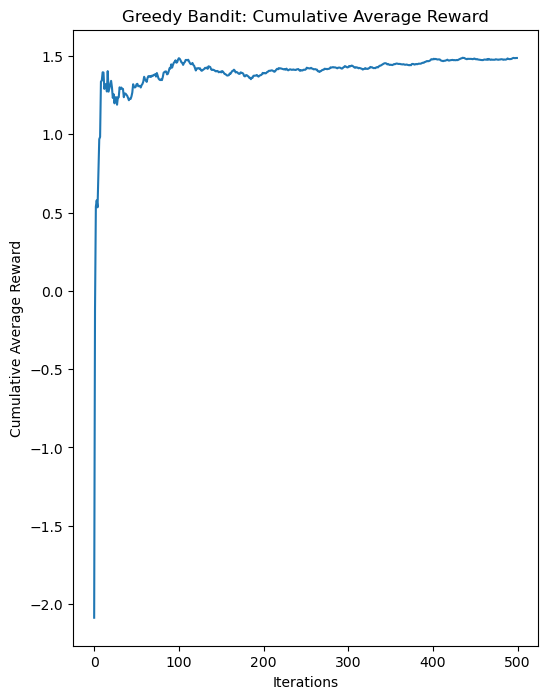

In [35]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_avg = np.cumsum(results) / np.arange(1, len(results) + 1)

plt.figure()
plt.figure(figsize=(6,8))
plt.plot(cumulative_avg)
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Greedy Bandit: Cumulative Average Reward")
plt.show()


## $\epsilon$-greedy Algorithm

In [21]:
def run_epsilon_greedy(epsilon):
    import random

def run_epsilon_greedy(bandits, epsilon=0.1, iterations=1000):
    n_bandits = len(bandits)
    
    q_estimates = [0.0] * n_bandits
    action_counts = [0] * n_bandits
    
    rewards_history = []

    for _ in range(iterations):
        if random.random() < epsilon:
            chosen_idx = random.randint(0, n_bandits - 1)
        else:
            max_val = max(q_estimates)
            max_indices = [i for i, val in enumerate(q_estimates) if val == max_val]
            chosen_idx = random.choice(max_indices)

        
        reward = bandits[chosen_idx].pullLever()
        rewards_history.append(reward)

        
        action_counts[chosen_idx] += 1
        n = action_counts[chosen_idx]
        q_estimates[chosen_idx] += (1 / n) * (reward - q_estimates[chosen_idx])

    return rewards_history
results_epsilon = run_epsilon_greedy(bandits, iterations=500)

print(f"Total Reward Collected: {sum(results_epsilon):.2f}")
print(f"Average Reward per Pull: {sum(results_epsilon)/len(results_epsilon):.2f}")

Total Reward Collected: 804.58
Average Reward per Pull: 1.61


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

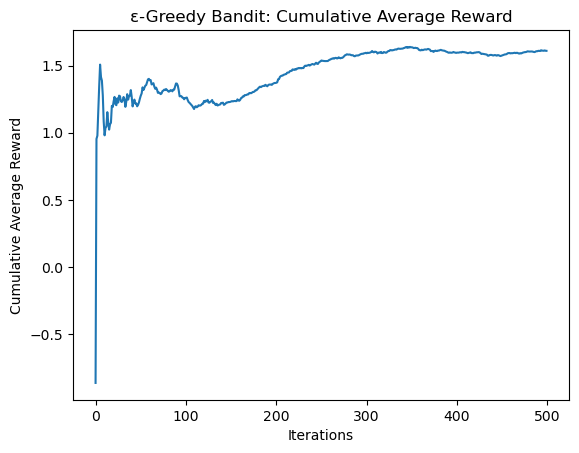

In [24]:
import numpy as np
import matplotlib.pyplot as plt

cumulative_avg = np.cumsum(results_epsilon) / np.arange(1, len(results_epsilon) + 1)

plt.figure()
plt.plot(cumulative_avg)
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("ε-Greedy Bandit: Cumulative Average Reward")
plt.show()


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

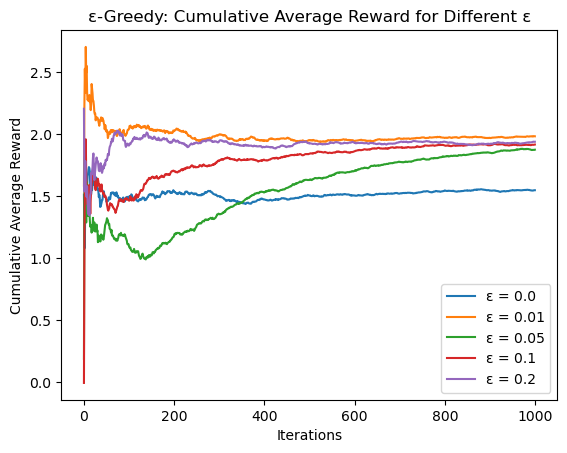

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean

    def pullLever(self):
        return self.true_mean + random.gauss(0, 1)

def run_epsilon_greedy(bandits, epsilon, iterations=1000):
    n_bandits = len(bandits)
    q_estimates = [0.0] * n_bandits
    action_counts = [0] * n_bandits
    rewards = []

    for _ in range(iterations):
        if random.random() < epsilon:
            action = random.randint(0, n_bandits - 1)
        else:
            max_q = max(q_estimates)
            best_actions = [i for i, q in enumerate(q_estimates) if q == max_q]
            action = random.choice(best_actions)

        reward = bandits[action].pullLever()
        rewards.append(reward)

        action_counts[action] += 1
        q_estimates[action] += (1 / action_counts[action]) * (reward - q_estimates[action])

    return rewards
true_means = [1.0, 1.5, 2.0]
bandits = [Bandit(m) for m in true_means]
epsilons = [0.0, 0.01, 0.05, 0.1, 0.2]


plt.figure()
for eps in epsilons:
    rewards = run_epsilon_greedy(bandits, eps, iterations=1000)
    cumulative_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
    plt.plot(cumulative_avg, label=f"ε = {eps}")

plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("ε-Greedy: Cumulative Average Reward for Different ε")
plt.legend()
plt.show()


## Optimistic Initial Values

In [36]:
def run_opt_greedy():
    import random

def run_opt_greedy(bandits, iterations=1000, optimistic_value=5.0):
    n_bandits = len(bandits)
    
    
    q_estimates = [optimistic_value] * n_bandits
    action_counts = [0] * n_bandits
    
    rewards_history = []

    for _ in range(iterations):
        max_val = max(q_estimates)
        max_indices = [i for i, val in enumerate(q_estimates) if val == max_val]
        chosen_idx = random.choice(max_indices)

        reward = bandits[chosen_idx].pullLever()
        rewards_history.append(reward)

        action_counts[chosen_idx] += 1
        n = action_counts[chosen_idx]
        q_estimates[chosen_idx] += (1 / n) * (reward - q_estimates[chosen_idx])

    return rewards_history
results_opt = run_opt_greedy(bandits, iterations=500)

print(f"Total Reward Collected: {sum(results_opt):.2f}")
print(f"Average Reward per Pull: {sum(results_opt)/len(results_opt):.2f}")

Total Reward Collected: 1011.31
Average Reward per Pull: 2.02


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

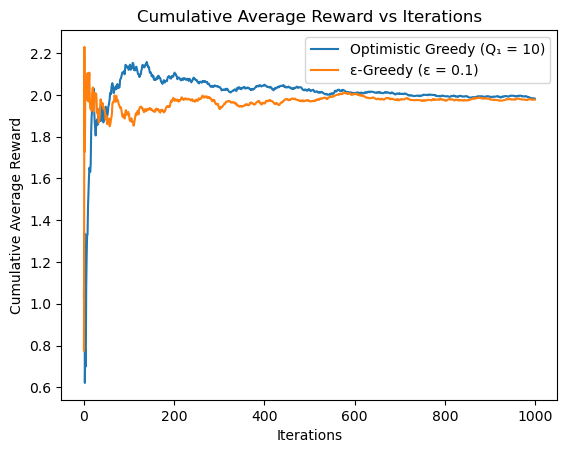

In [31]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean

    def pullLever(self):
        return self.true_mean + random.gauss(0, 1)

def run_optimistic_greedy(bandits, iterations=1000, optimistic_value=10.0):
    n_bandits = len(bandits)
    q_estimates = [optimistic_value] * n_bandits
    action_counts = [0] * n_bandits
    rewards = []

    for _ in range(iterations):
        max_q = max(q_estimates)
        best_actions = [i for i, q in enumerate(q_estimates) if q == max_q]
        action = random.choice(best_actions)

        reward = bandits[action].pullLever()
        rewards.append(reward)

        action_counts[action] += 1
        q_estimates[action] += (1 / action_counts[action]) * (reward - q_estimates[action])

    return rewards


def run_epsilon_greedy(bandits, epsilon=0.1, iterations=1000):
    n_bandits = len(bandits)
    q_estimates = [0.0] * n_bandits
    action_counts = [0] * n_bandits
    rewards = []

    for _ in range(iterations):
        if random.random() < epsilon:
            action = random.randint(0, n_bandits - 1)
        else:
            max_q = max(q_estimates)
            best_actions = [i for i, q in enumerate(q_estimates) if q == max_q]
            action = random.choice(best_actions)

        reward = bandits[action].pullLever()
        rewards.append(reward)

        action_counts[action] += 1
        q_estimates[action] += (1 / action_counts[action]) * (reward - q_estimates[action])

    return rewards


true_means = [1.0, 1.5, 2.0]
bandits = [Bandit(m) for m in true_means]


rewards_opt = run_optimistic_greedy(bandits, iterations=1000, optimistic_value=10.0)
rewards_eps = run_epsilon_greedy(bandits, epsilon=0.1, iterations=1000)


cum_avg_opt = np.cumsum(rewards_opt) / np.arange(1, len(rewards_opt) + 1)
cum_avg_eps = np.cumsum(rewards_eps) / np.arange(1, len(rewards_eps) + 1)


plt.figure()
plt.plot(cum_avg_opt, label="Optimistic Greedy (Q₁ = 10)")
plt.plot(cum_avg_eps, label="ε-Greedy (ε = 0.1)")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Average Reward")
plt.title("Cumulative Average Reward vs Iterations")
plt.legend()
plt.show()


## Optional - Upper Confidence Bound (UCB)

In [8]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass